In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def load_bounding_boxes():
    robot_bounding_boxes = []
    label_paths = sorted(os.listdir("data/train/labels"))
    for label_path in label_paths:
        label_strings = open("data/train/labels/"+label_path).read().splitlines()
        for label_string in label_strings:
            if np.fromstring(label_string[0], sep=" ", dtype=np.float32) == 1:
                robot_bounding_boxes.append(np.fromstring(label_string[1:], sep=" ", dtype=np.float32)[2:])
    robot_bounding_boxes = np.array(robot_bounding_boxes)
    return robot_bounding_boxes
robot_bounding_boxes = load_bounding_boxes()

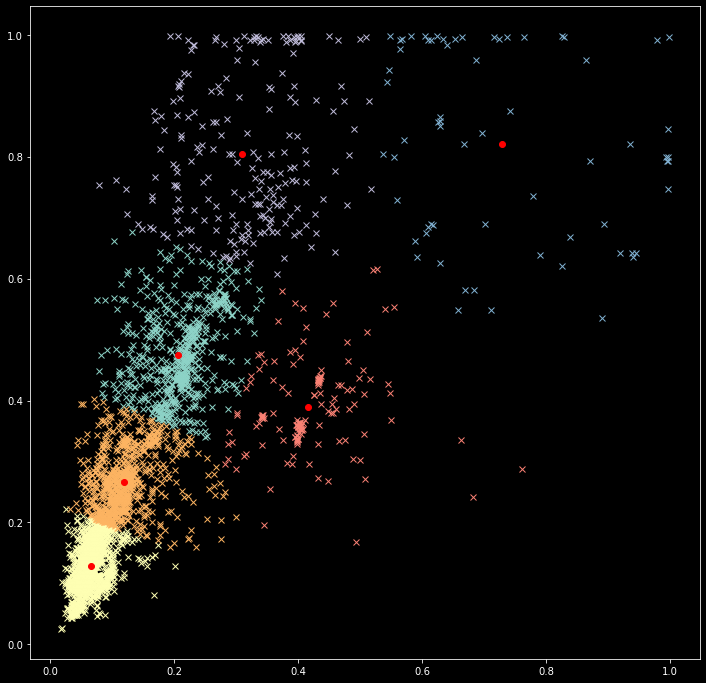

In [90]:
def cluster_centers(robot_bounding_boxes, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(robot_bounding_boxes)
    centers = kmeans.cluster_centers_
    clustering = best_cluster_center(robot_bounding_boxes, centers)
    return centers, clustering
# Color the points accoding to their cluster

def best_cluster_center(bounding_boxes, centers):
    distances = np.linalg.norm(bounding_boxes.reshape((-1,1,2))-centers.reshape((1,-1,2)), axis=2)
    return np.argmin(distances, axis=1)

def visualize_cluster_centers(centers, clustering):
    n_centers = centers.shape[0]
    plt.figure(figsize=(12,12))
    for i in range(n_centers):
        plt.plot(robot_bounding_boxes[clustering==i,0], robot_bounding_boxes[clustering==i,1], 'x', color='C'+str(i))
        plt.plot(centers[i,0], centers[i,1], 'o', color='red')
        
centers, clustering = cluster_centers(robot_bounding_boxes, 6)
visualize_cluster_centers(centers, clustering)

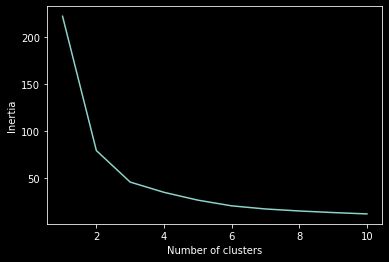

array([[0.06549374, 0.12928654],
       [0.11965626, 0.26605093],
       [0.20708716, 0.38876095],
       [0.31018215, 0.47485098],
       [0.415882  , 0.8048184 ],
       [0.7293086 , 0.8216225 ]], dtype=float32)

In [94]:
def determine_optimal_cluster_number(bounding_boxes, max_clusters=10):
    inertias = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(bounding_boxes)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters+1), inertias)
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.show()
    return inertias
inertias = determine_optimal_cluster_number(robot_bounding_boxes, max_clusters=10)
np.sort(centers, axis=0)